# Método dos Elementos Finitos





### O problema a ser resolvido envolve o deslocamento de uma barra de seção transversal uniforme e biapoiada, com extremidades fixas.
<div style="display: flex; justify-content: center;">
  <img src="barra.png" alt="Imagem 1" style="width: 45%; margin-right: 5px;">
  <img src="barra2.png" alt="Imagem 2" style="width: 45%; margin-left: 5px;">
</div>

 Considere o seguinte problema de valor de contorno:

$$
-\frac{d^2u}{dx^2} - u(x) + x^2 = 0, \quad 0 \leq x \leq 1
$$
com condições de contorno
$
u(0) = 0 \quad \text{e} \quad u(1) = 0.
$ <br>
Forma fraca: 
$$
\int_0^1 \frac{dw}{dx} \frac{du}{dx} dx - \int_0^1 u(x) w(x) dx + \int_0^1 x^2 w(x) dx = 0
$$



Para resolver este problema utilizando dois elementos finitos com funções de forma quadráticas (cada elemento com três nós), é necessário realizar a discretização do domínio em dois elementos. A solução aproximada será então comparada com a solução exata, bem como com a solução obtida por aproximações lineares (embora não esteja disponível, pois é análoga, exceto pela mudança nas funções de forma e pela individualização dos elementos), e será também comparada com a solução obtida via diferenças finitas usando a mesma discretização do domínio. <br>
Para maior cobertura sobre o assunto é sugerido o minicurso [Introdução ao Método dos Elementos Finitos](https://www.youtube.com/watch?v=VyT2uYMYbuk)

#### Funções de forma:
Funções de forma $L_{e_1}$, $L_{e_2}$, $L_{e_3}$:
- $L_{e_1}(x) = (1-2x)(1-4x)$
- $L_{e_2}(x) = 8x(1-2x)$
- $L_{e_3}(x) = -2x(1-4x)$

Derivadas das funções de forma $DLe_1$, $DLe_2$, $DLe_3$:
- $DLe_1(x) = 16x - 6$
- $DLe_2(x) = 8(1-4x)$
- $DLe_3(x) = -2(1-8x)$



#### Matriz de rigidez

Cálculo dos elementos da linha 1

- $k_{11}= \int_{0}^{0.5} ((16x - 6)^2 - (1-2x)(1-4x)^2) \, dx$
- $k_{12}= \int_{0}^{0.5} ((16x - 6) \cdot (8(1-4x)) - (1-2x) \cdot (8x(1-2x))) \, dx$
- $k_{13}= \int_{0}^{0.5} ((16x - 6) \cdot (-2(1-8x)) - (1-2x) \cdot (-2x(1-4x))) \, dx$

Cálculo dos elementos da linha 2

- $k_{21}= \int_{0}^{0.5} ((8(1-4x)) \cdot (16x - 6) - (8x(1-2x)) \cdot (1-2x)) \, dx$
- $k_{22}= \int_{0}^{0.5} ((8(1-4x))^2 - (8x(1-2x))^2) \, dx$
- $k_{23}= \int_{0}^{0.5} ((8(1-4x)) \cdot (-2(1-8x)) - (8x(1-2x)) \cdot (-2x(1-4x))) \, dx$

Cálculo dos elementos da linha 3

- $k_{31}= \int_{0}^{0.5} ((-2(1-8x)) \cdot (16x - 6) - (-2x(1-4x)) \cdot (1-2x)) \, dx$
- $k_{32}= \int_{0}^{0.5} ((-2(1-8x)) \cdot (8(1-4x)) - (-2x(1-4x)) \cdot (8x(1-2x))) \, dx$
- $k_{33}= \int_{0}^{0.5} ((-2(1-8x))^2 - (-2x(1-4x))^2) \, dx$

</br> 
Assim temos as matriz locais: 

$
\begin{bmatrix}
-4.6 & 5.36666667 & -0.68333333 \\
5.36666667 & -10.4 & 5.36666667 \\
-0.68333333 & 5.36666667 & -4.6 \\
\end{bmatrix}
$





#### Matriz de rigidez global
Como os elementos são equidistante a matrix de rigidez local é a mesma para os dois elementos finitos, então temos:

$
K = \begin{bmatrix}
K_{11} & K_{12} & K_{13} & 0 & 0 \\
K_{21} & K_{22} & K_{23} & 0 & 0 \\
K_{31} & K_{32} & K_{33} + K_{11}  & K_{12} & K_{13}  \\
0 & 0  & K_{21}  & K_{22} & K_{23} \\
0 & 0  & K_{31} & K_{32} & K_{33}
\end{bmatrix}  
$ = $
\begin{bmatrix}
-4.6 & 5.36666667 & -0.68333333 & 0 & 0 \\
5.36666667 & -10.4 & 5.36666667 & 0 & 0 \\
-0.68333333 & 5.36666667 & -9.2 & 5.36666667 & -0.68333333 \\
0 & 0 & 5.36666667 & -10.4 & 5.36666667 \\
0 & 0 & -0.68333333 & 5.36666667 & -4.6 \\
\end{bmatrix}
$
 


#### Vetores de Força ($F_{e_s}$)

Cálculo dos vetores de força do primeiro elemento:

- $Fe_{11} = \int_{0}^{0.5} ((1-2x)(1-4x) \cdot (-x^2)) \, dx$
- $Fe_{21} = \int_{0}^{0.5} (8x(1-2x) \cdot (-x^2)) \, dx$
- $Fe_{31} = \int_{0}^{0.5} (-2x(1-4x) \cdot (-x^2)) \, dx$

Cálculo dos vetores de força do segundo elemento:

- $Fe_{12} = \int_{0}^{0.5} (-(1-2x)(1-4x) \cdot (-(x+0.5)^2)) \, dx$
- $Fe_{22} = \int_{0}^{0.5} (8x(1-2x) \cdot (-(x+0.5)^2)) \, dx$
- $Fe_{32} = \int_{0}^{0.5} (-2x(1-4x) \cdot (-(x+0.5)^2)) \, dx$


Assim temos :  <br>
$$
K = \begin{bmatrix}
K_{11} & K_{12} & K_{13} & 0 & 0 \\
K_{21} & K_{22} & K_{23} & 0 & 0 \\
K_{31} & K_{32} & K_{33} + K_{11}  & K_{12} & K_{13}  \\
0 & 0  & K_{21}  & K_{22} & K_{23} \\
0 & 0  & K_{31} & K_{32} & K_{33}
\end{bmatrix}  
 = 

\begin{bmatrix}
Fe_{11} \\
Fe_{21} \\
Fe_{31} + Fe_{12} \\
Fe_{22} \\
Fe_{32} \\
\end{bmatrix}
$$<br>

$$
\begin{bmatrix}
-4.6 & 5.36666667 & -0.68333333 & 0 & 0 \\
5.36666667 & -10.4 & 5.36666667 & 0 & 0 \\
-0.68333333 & 5.36666667 & -9.2 & 5.36666667 & -0.68333333 \\
0 & 0 & 5.36666667 & -10.4 & 5.36666667 \\
0 & 0 & -0.68333333 & 5.36666667 & -4.6 \\
\end{bmatrix}
 = \begin{bmatrix}
-0.00208333 \\
0.025 \\
0.0375 \\
0.19166667 \\
0.08125 \\
\end{bmatrix}$$


Por conta das condições de controlo $u(0)=0$ e $u(1)=1$, o sistema é reduzido a uma matriz 3x3 
$$ \begin{bmatrix}
-10.4 & 5.36666667 & 0 \\
5.36666667 & -9.2 & 5.36666667 \\
0 & 5.36666667 & -10.4 \\
\end{bmatrix} = \begin{bmatrix}
0.025 \\
0.0375 \\
0.19166667 \\
\end{bmatrix}$$

<br><br> <br>
Resolvendo o sistema temos: 
$u(1) = -0.02344691$, $u(2) = -0.04077911$, $u(3) = -0.03947255$ 

 

#### Resconstrução das soluções:
$$U_{e}(x) = L_1(x)u_1 + L_2(x)u_2 + L_3(x)u_3$$
- 1º elemento:  <br>
$ 
8(x - 0.25)(x - 0.5) \cdot 0 - 16(x)(x - 0.5) \cdot -0.04077911 + 8(x)(x - 0.25) \cdot -0.03947255= $ 
```0.33668536x²-0.24728778x ```


- 2º elemento: <br>
$
8(x - 0.75) \cdot -0.02344691  - 16(x-0.5)(x-1) \cdot -0.04077911 + 8(x-0.5)(x-0.75) \cdot 0 =$ ``0.65246576x²-1.16627392x+0.46691434``


   


### Implementação computacional das soluções por diferenças finitas, elementos finitos com funções de forma lineares e funções de forma quadráticas.

In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# diferenças finitas 

def p(x):
    return 0

def q(x):
    return -1 

def r(x):
    return x**2

def dif_finit(N=4,x0=0,y0=0,xf=1,yf=0):
    delta_x = (xf-x0)/N
    # print(delta_x)
    vetor_x = np.linspace(x0+delta_x, xf - delta_x,N-1)
    # print(vetor_x)
    dimensao_Sistema = N-1
    # print(dimensao_Sistema)
    A = np.zeros((dimensao_Sistema,dimensao_Sistema))
    b = np.zeros(dimensao_Sistema)
    
    for i in range(dimensao_Sistema):
        x = vetor_x[i]
        for j in range(dimensao_Sistema):
            if i == j:
                A[i][j] = 2 + q(x)*pow(delta_x,2)
            elif i == (j +1):
                A[i][j] = -1 - (p(x)*(delta_x))/2    
            elif i == (j-1):
                A[i][j] = -1 + (p(x)*(delta_x))/2
            else:
                A[i][j] = 0
              
    for i in range(dimensao_Sistema):
        x = vetor_x[i]
        if i == 0:
            b[i] = (1 + (p(x)*(delta_x))/2)*y0 - r(x)*pow(delta_x,2)
        elif i == (dimensao_Sistema-1):
            b[i] = (1 - (p(x)*(delta_x))/2)*yf - r(x)*pow(delta_x,2) 
        else:
            b[i] = -r(x)*pow(delta_x,2) 
    # print(A)  
    # print(b)        
    y = np.linalg.solve(A,b)
    
    return y.tolist()                                  

In [3]:
###  Elementos finitos com funções de forma lineares:
#Funções de forma
def elementos_lienares(qtd):
    def le1(x):
        return (1-4*x)
    def le2(x):
        return (4*x)
    # derivada das funções de forma
    def dle1(x):
        return -4
    def dle2(x):
        return 4

    # Matriz de ridigez:
    # 1º elemento
    a,b = 0, 0.25
    k11, _ = quad(lambda x: dle1(x) * dle1(x) - le1(x) * le1(x), a, b)
    k12, _ =  quad(lambda x: dle1(x) * dle2(x) - le1(x) * le2(x), a, b)
    k22, _ = quad(lambda x: dle2(x) * dle2(x) - le2(x) * le2(x), a, b)

    K_l = np.array([[k11, k12],
                [k12, k22]])


    # Montagem da matriz:

    def combinedmatrix(x, y):
        lx = len(x)
        ly = len(y)
        tam = ((lx+ly) -1)
        q = lx-1
        new_matrix = np.zeros((tam,tam))
        new_matrix[0:lx, 0:lx] = x
        new_matrix[lx-1:tam, lx-1:tam] = y
        new_matrix[q,q] = x[q,q] + y[0,0]

        return new_matrix

    def sume(lista):
        primeiro =  lista[0]
        ultimo = lista[-1]
        novalista = lista[1:-1]
        new_tmp = []
        new_tmp.append(primeiro)
        for i in range(0, len(novalista), 2):
        # Verificando se há pelo menos dois elementos restantes para somar
            if i + 1 < len(lista):
                # Somando os elementos consecutivos
                soma = novalista[i] + novalista[i + 1]
                new_tmp.append(soma)
        new_tmp.append(ultimo)

        return new_tmp

    def calcular_elementos(num_elementos):
        elementos = []
        h = 1/num_elementos 
        
        for i in range(1, num_elementos + 1):
            a = (i - 1) / num_elementos
            b = i / num_elementos
            
            Fe1, _ = quad(lambda x: ((b - x) / h) * (-x**2), a, b)
            Fe2, _ = quad(lambda x: ((x - a) / h) * (-x**2), a, b)
            
            elementos.append(Fe1)
            elementos.append(Fe2)
        
        return elementos

    def feis_cal(qtd):
        f = calcular_elementos(qtd)
        return sume(f)

    def matri_global(qtd):
        matrixt = None
        for i in range(1,qtd-1):
            if i == 1 :
                matrixt = combinedmatrix(K_l,K_l)
            matrixt = combinedmatrix(matrixt,K_l)
        return matrixt

# Multiplos elementos:

    matrix_rigidez_global = matri_global(qtd)
    feis = np.array([feis_cal(qtd)])
    Ut = np.linalg.solve(matrix_rigidez_global[1:-1, 1:-1], feis[:, 1:-1].flatten())
    return Ut.tolist()


In [4]:
# Elementos com funções de forma quadraticas
#Funções de forma
# hf é h1  ou h só que fixo para as funções me 0.5


hf = 0.5
def le1(x):
    return (1-2*x)*(1-4*x)#(1-(x/hf))*(1-2*(x/hf))
def le2(x):
    return 8*x*(1-2*x)#4*(x/hf)*(1-(x/hf))
def le3(x):
    return -2*x*(1-4*x)#-(x/hf)*(1 - (2*x/hf))
# derivada das funções de forma
def dle1(x):
    return (16*x - 6) #((4*x)/hf**2) - 3/hf
def dle2(x):
    return 8*(1-4*x) #(4/hf) * (1-2*(x/hf))
def dle3(x):
    return -2*(1-8*x)#-(1/hf) * (1- (4*x)/hf)

# Matriz de ridigez local:
# 1º elemento
a,b = 0, 0.5
# para k1 
k11, _ = quad(lambda x: -(dle1(x) * dle1(x)) + le1(x) * le1(x), a, b)
k12, _ = quad(lambda x: -(dle1(x) * dle2(x)) + le1(x) * le2(x), a, b)
k13, _ = quad(lambda x: -(dle1(x) * dle3(x)) + le1(x) * le3(x), a, b)
# para k2 
k21, _ = quad(lambda  x: -(dle2(x) * dle1(x)) + le1(x) * le2(x), a, b)
k22, _ = quad(lambda  x: -(dle2(x) * dle2(x) )+ le2(x) * le2(x), a, b)
k23, _ = quad(lambda  x: -(dle2(x) * dle3(x)) + le2(x) * le3(x), a, b)
# para k3
k31, _ = quad(lambda  x: -(dle3(x) * dle1(x) )+ le3(x) * le1(x), a, b)
k32, _ = quad(lambda  x: -(dle3(x) * dle2(x)) + le3(x) * le2(x), a, b)
k33, _ = quad(lambda  x: -(dle3(x) * dle3(x)) + le3(x) * le3(x), a, b)


K = np.array([[k11, k12, k13],
              [k12, k22, k12],
              [k31, k12, k11]])

# Montagem da matriz global:

def combinedmatrix(x, y):
    lx = len(x)
    ly = len(y)
    tam = ((lx+ly) -1)
    q = lx-1
    new_matrix = np.zeros((tam,tam))
    new_matrix[0:lx, 0:lx] = x
    new_matrix[lx-1:tam, lx-1:tam] = y
    new_matrix[q,q] = x[q,q] + y[0,0]

    return new_matrix

m1  = combinedmatrix(K, K)
print("matriz local \n", K,"\n\n")

# Calculando os Fei:
#1º elemento: 0, 0,5
a, b = 0, 0.5
Fe11, _ = quad(lambda x: le1(x) * ((x**2)), a, b)
Fe21, _ = quad(lambda x: le2(x) * ((x**2)), a, b)
Fe31, _ = quad(lambda x: le3(x) * ((x**2)), a, b)
#2º elemento: 0, 0,5
# a = 0.5
# b=1
Fe12, _ = quad(lambda x: le1(x) * ((x+0.5)**2), a, b)
Fe22, _ = quad(lambda x: le2(x) * ((x+0.5)**2), a, b)
Fe32, _ = quad(lambda x: le3(x) * ((x+0.5)**2), a, b)

# Vetor de força
F = np.array([[Fe11, Fe21, Fe31 + Fe12, Fe22, Fe32 ]])

print("F", F)
# Resolvendo o sistema linear:
Us  = np.linalg.solve(m1[1:-1, 1:-1], F[:, 1:-1].flatten())

# Reconstrução da solução:

def sol_p(x):
    return   (-16 * (x)*(x-0.5))*Us[1]+ ((8*(x)*(x-0.25)))*Us[2]

def sol_s(x): 
    return (8*(x-0.75)*(x-1))*Us[0] + (-16*(x-0.5)*(x-1))*Us[2]


def elementos_quadraticos_solucao_reconstruida(x):
        val = None
        if x == 0.5:
            val = (sol_p(x)+sol_s(x))/2
        elif x < 0.5:
            val = sol_p(x)
        elif x > 0.5:
            val = sol_s(x)
        return val


print('\n\n\nMatriz de rigidez\n', m1,'\n')
print("Solução: ",(Us))

matriz local 
 [[ -4.6          5.36666667  -0.68333333]
 [  5.36666667 -10.4          5.36666667]
 [ -0.68333333   5.36666667  -4.6       ]] 


F [[-0.00208333  0.025       0.0375      0.19166667  0.08125   ]]



Matriz de rigidez
 [[ -4.6          5.36666667  -0.68333333   0.           0.        ]
 [  5.36666667 -10.4          5.36666667   0.           0.        ]
 [ -0.68333333   5.36666667  -9.2          5.36666667  -0.68333333]
 [  0.           0.           5.36666667 -10.4          5.36666667]
 [  0.           0.          -0.68333333   5.36666667  -4.6       ]] 

Solução:  [-0.02344691 -0.04077911 -0.03947255]


In [5]:
# solução exata
def u(x):
    return 2 * np.cos(x) + (1 - 2 * np.cos(1)) / np.sin(1) * np.sin(x) + x**2 - 2


Analise o erro em relação à solução exata e à solução via diferenças finitas. Você pode definir este erro como o desvio quadrático

$$
\sum_{i} (u_i^{\text{aprox}} - u_i^{\text{exato}})^2
$$

onde $u_i^{\text{aprox}}$ é a solução aproximada e $u_i^{\text{exato}}$ é a solução exata no ponto $i$. <br>

E também o erro relativo

$$
\sum_{i} \frac{|u_i^{\text{aprox}}- u_i^{\text{exato}}|}{|u_i^{\text{exato}}|}
$$

5
Dados gerados:


,Solução Exata,EF com Funções Quadráticas,EF com Funções Lineares,Diferenças Finitas
0,0.000000,0.000000,0.000000,0.000000
1,-0.023374,-0.023447,-0.023233,-0.022420
2,-0.040759,-0.040779,-0.040519,-0.039532
3,-0.039417,-0.039473,-0.039191,-0.038549
4,0.000000,0.000000,0.000000,0.000000



Erros totais acumulados:


,EF com Funções Quadráticas,EF com Funções Lineares,Diferenças Finitas
Desvio quadrático,8.853070e-09,1.280806e-07,0.000003
Erro Relativo,3.168008e-07,3.545428e-06,0.000095


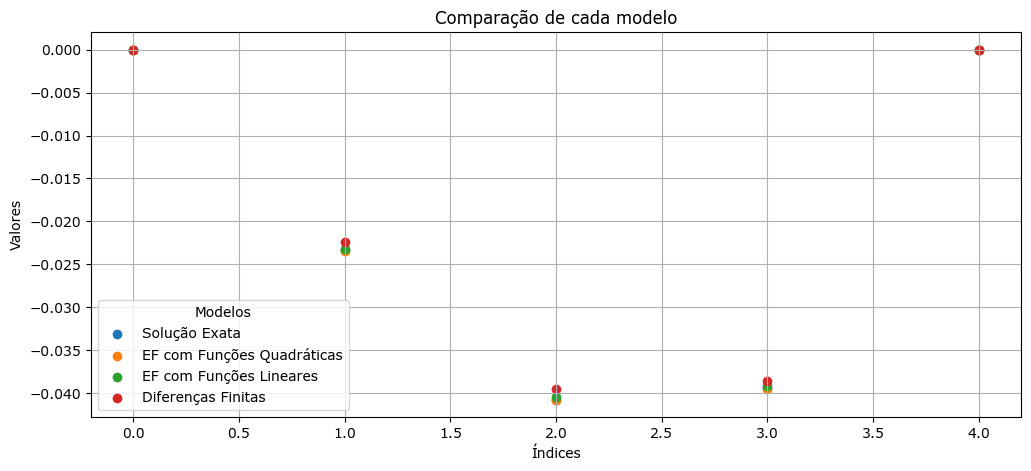

In [6]:
def erros(exato, aprox):
    absoluto = abs(aprox - exato)**2
    relativo = absoluto / abs(exato) if exato != 0 else 0
    return absoluto, relativo


def tablet(qtd):

    tam = 1 / qtd
    cont = np.arange(0, 1+tam, tam)
    exata = [u(i) for i in cont]
    quadratica = [0] + Us.tolist() + [0]

    diferencas_finitas = [0] + dif_finit(N=qtd) + [0]
    lienares_sol = [0] + elementos_lienares(qtd) + [0]

    len_exata = len(exata)
    len_quadratica = len(quadratica)
    len_diferencas_finitas = len(diferencas_finitas)
    len_lienares_sol = len(lienares_sol)

    print(len_lienares_sol)

    if not (len_exata == len_quadratica == len_diferencas_finitas == len_lienares_sol):
        raise ValueError("As listas têm tamanhos diferentes.")
    
    
    data_com = pd.DataFrame({
        'Solução Exata': exata,
        'EF com Funções Quadráticas': quadratica,
        'EF com Funções Lineares': lienares_sol,
        'Diferenças Finitas': diferencas_finitas
    })

    errors = {}
    exact_column = 'Solução Exata'

    for column in data_com.columns:
        if column != exact_column:
            absolute_errors = []
            relative_errors = []
            for exato, aprox in zip(data_com[exact_column], data_com[column]):
                abs_error, rel_error = erros(exato, aprox)
                absolute_errors.append(abs_error)
                relative_errors.append(rel_error)
            errors[column] = {
                'Desvio quadrático': sum(absolute_errors),
                'Erro Relativo': sum(relative_errors)  
            }

 
    sum_errors_df = pd.DataFrame(errors)
    print("Dados gerados:")
    display(data_com)
    print("\nErros totais acumulados:")
    display(sum_errors_df)

    fig = go.Figure()

    for column in data_com.columns:
        fig.add_trace(go.Scatter(x=data_com.index, y=data_com[column], mode='markers', name=column))

   
    fig.update_layout(
        title='Comparação de cada modelo',
        xaxis_title='Índices',
        yaxis_title='Valores',
        legend=dict(
            title='Modelos'
        ),
        showlegend=True,
        xaxis=dict(showgrid=True),  
        yaxis=dict(showgrid=True) ,
        width=1200,  
        height=500
    )

    fig.show()

    plt.figure(figsize=(12, 5))  
    for column in data_com.columns:
        plt.scatter(data_com.index, data_com[column], label=column)

    plt.title('Comparação de cada modelo')
    plt.xlabel('Índices')
    plt.ylabel('Valores')


    plt.legend(title='Modelos')

    plt.grid(True)


    plt.show()

tablet(qtd=4)  